In [55]:
# Pandas for managing datasets
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns

Next, we load the sample data. The argument index_col=0 simply means we'll treat the first column of the dataset as the ID column.

In [56]:
# Read dataset
df = pd.read_csv('pokemon.csv', index_col=0)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


By the way, Seaborn doesn't have a dedicated scatter plot function, which is why you see a diagonal line. We actually used Seaborn's function for fitting and plotting a regression line.

Thankfully, each plotting function has several useful options that you can set. Here's how we can tweak the `lmplot()` (lm stands for linear model):

- First, we'll set fit_reg=False to remove the regression line, since we only want a scatter plot.
- Then, we'll set hue='Stage' to color our points by the Pokémon's evolution stage. This hue argument is very useful because it allows you to express a third dimension of information using color.

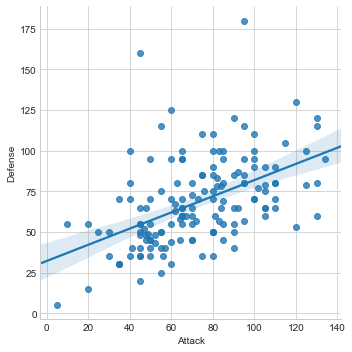

In [57]:
# a scatter plot
sns.lmplot(x='Attack', y='Defense', data=df)

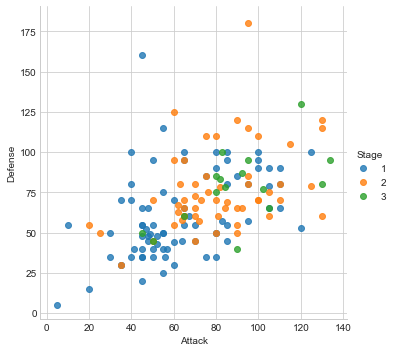

In [58]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

NOTE: the issue about axes limits falling below zero in the original tutorial does not exist in the latest version as you can see above. But how to tweak seaborn with matplotlib is still useful. We change the limits to negative just to illustrate how the tweating works.

Remember, Seaborn is a high-level interface to Matplotlib. From our experience, Seaborn will get you most of the way there, but you'll sometimes need to bring in Matplotlib.

Setting your axes limits is one of those times, but the process is pretty simple:

- First, invoke your Seaborn plotting function as normal.
- Then, invoke Matplotlib's customization functions. In this case, we'll use its ylim() and xlim() functions.

(-20, 141.95596011521178)

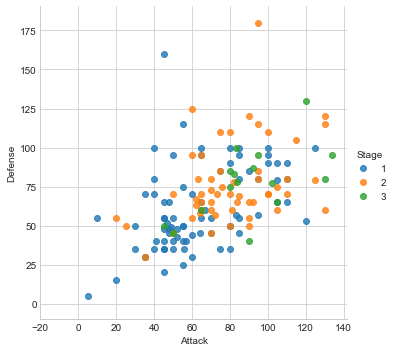

In [59]:
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(-10, None)
plt.xlim(-20, None)

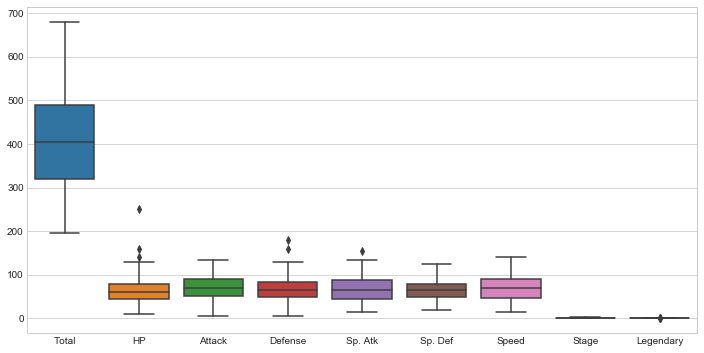

In [60]:
# Boxplot
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.boxplot(data=df)


Well, that's a reasonable start, but there are some columns we'd probably like to remove:

We can remove the Total since we have individual stats.
We can remove the Stage and Legendary columns because they aren't combat stats.
In turns out that this isn't easy to do within Seaborn alone. Instead, it's much simpler to pre-format your DataFrame.

Let's create a new DataFrame called stats_df that only keeps the stats columns:

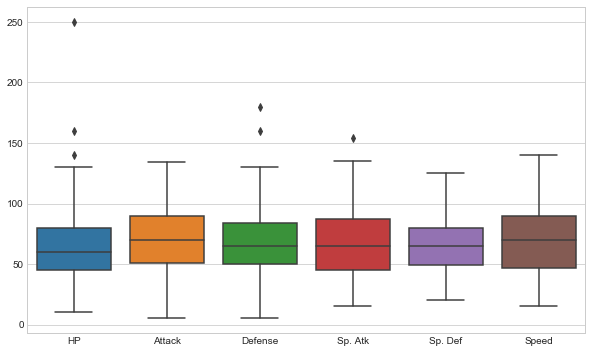

In [61]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
plt.figure(figsize=(10,6))
sns.boxplot(data=stats_df)

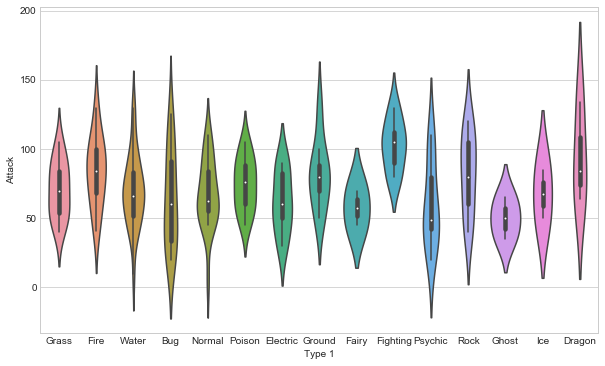

In [62]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
plt.figure(figsize=(10,6))
sns.violinplot(x='Type 1', y='Attack', data=df)

As you can see, Dragon types tend to have higher Attack stats than Ghost types, but they also have greater variance.

Now, Pokémon fans might find something quite jarring about that plot: The colors are nonsensical. Why is the Grass type colored pink or the Water type colored orange? We must fix this!


Fortunately, Seaborn allows us to set custom color palettes. We can simply create an ordered Python list of color hex values.

Let's use Bulbapedia (https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates) to help us create a new color palette and Now we can simply use the palette= argument to recolor our chart.

In [63]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

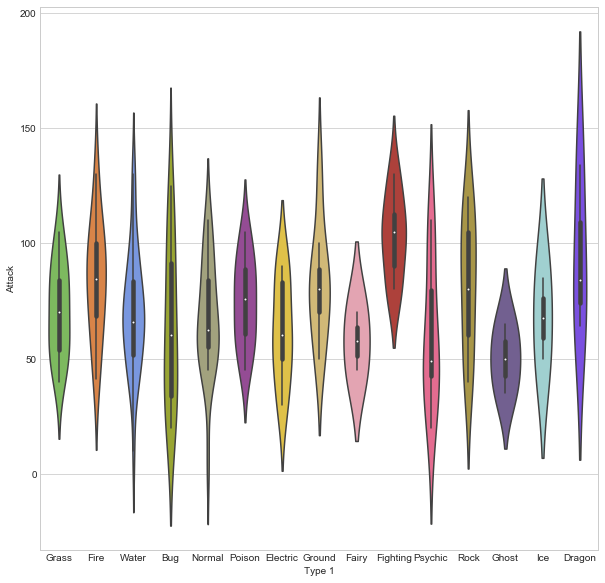

In [64]:
# Violin plot with Pokemon color palette
plt.figure(figsize=(10,10))
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

Much better!

Violin plots are great for visualizing distributions. However, since we only have 151 Pokémon in our dataset, we may want to simply display each point.

That's where the swarm plot comes in. This visualization will show each point, while "stacking" those with similar values:

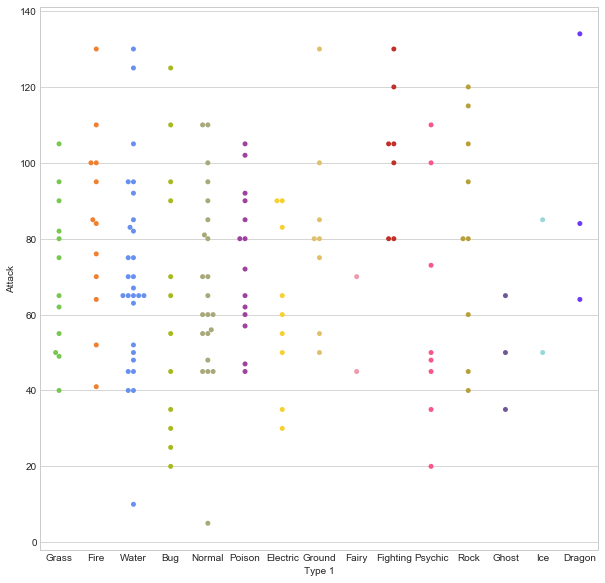

In [65]:
# Swarm plot with Pokemon color palette
plt.figure(figsize=(10,10))
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

That's handy, but can't we combine our swarm plot and the violin plot? After all, they display similar information, right?

The answer is yes.

It's pretty straightforward to overlay plots using Seaborn, and it works the same way as with Matplotlib. Here's what we'll do:

- First, we'll make our figure larger using Matplotlib.
- Then, we'll plot the violin plot. However, we'll set inner=None to remove the bars inside the violins.
- Next, we'll plot the swarm plot. This time, we'll make the points black so they pop out more.
- Finally, we'll set a title using Matplotlib.

Text(0.5,1,'Attack by Type')

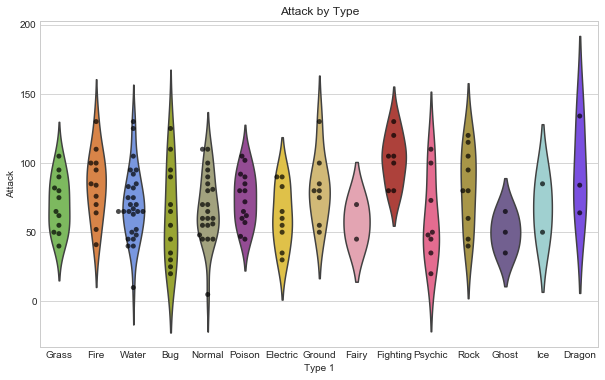

In [66]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

Awesome, now we have a pretty chart that tells us how Attack values are distributed across different Pokémon types. But what it we want to see all of the other stats as well?

Well, we could certainly repeat that chart for each stat. But we can also combine the information into one chart... we just have to do some data wrangling with Pandas beforehand.

First, here's a reminder of our data format:

In [67]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


As you can see, all of our stats are in separate columns. Instead, we want to "melt" them into one column.

To do so, we'll use Pandas's melt() function. It takes 3 arguments:

- First, the DataFrame to melt.
- Second, ID variables to keep (Pandas will melt all of the other ones).
- Finally, a name for the new, melted variable.

Here's the output:

In [68]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


All 6 of the stat columns have been "melted" into one, and the new Stat column indicates the original stat (HP, Attack, Defense, Sp. Attack, Sp. Defense, or Speed). For example, it's hard to see here, but Bulbasaur now has 6 rows of data.

In fact, if you print the shape of these two DataFrames...

...you'll find that melted_df has 6 times the number of rows as stats_df.

Now we can make a swarm plot with melted_df.

But this time, we're going to set x='Stat' and y='value' so our swarms are separated by stat.
Then, we'll set hue='Type 1' to color our points by the Pokémon type.

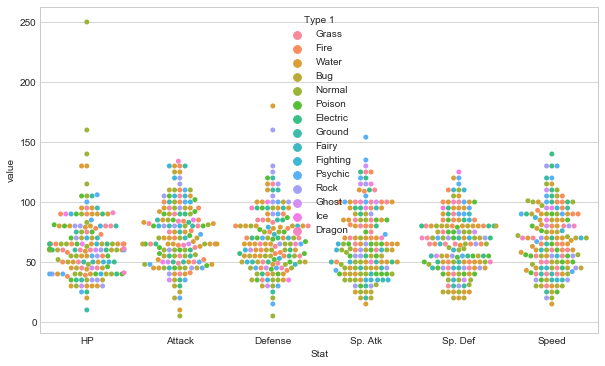

In [69]:
# Swarmplot with melted_df
plt.figure(figsize=(10,6))
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')

Finally, let's make a few final tweaks for a more readable chart:

Enlarge the plot.
Separate points by hue using the argument split=True .
Use our custom Pokemon color palette.
Adjust the y-axis limits to end at 0.
Place the legend to the right.

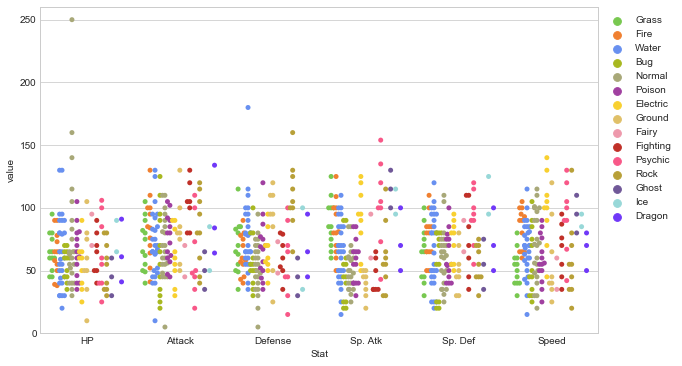

In [70]:
# 1. Enlarge the plot

plt.figure(figsize=(10,6))
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              dodge=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

We're going to conclude this tutorial with a few quick-fire data visualizations, just to give you a sense of what's possible with Seaborn.

10.1 - Heatmap

Heatmaps help you visualize matrix-like data.

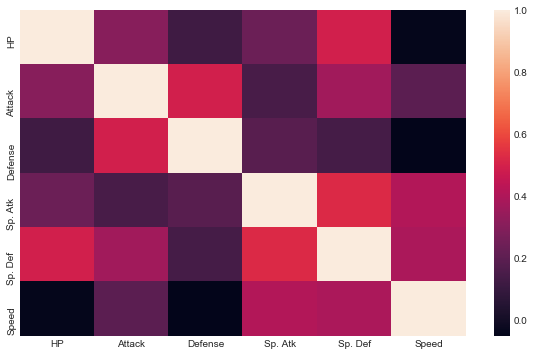

In [71]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr)

Histograms allow you to plot the distributions of numeric variables.

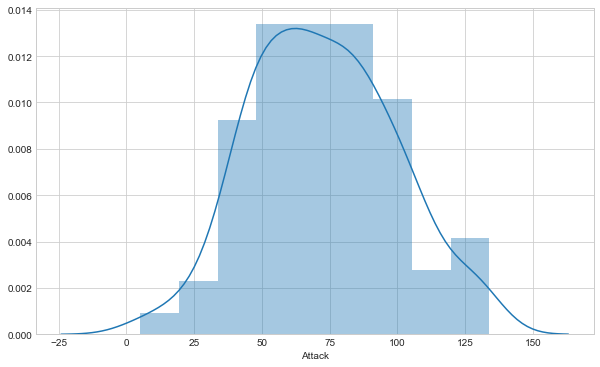

In [72]:
# Distribution Plot (a.k.a. Histogram)
plt.figure(figsize=(10,6))
sns.distplot(df.Attack)

Bar plots help you visualize the distributions of categorical variables.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

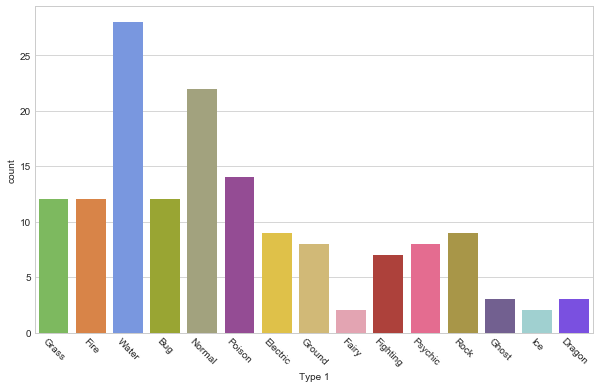

In [73]:
# Count Plot (a.k.a. Bar Plot)
plt.figure(figsize=(10,6))
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

Factor plots make it easy to separate plots by categorical classes

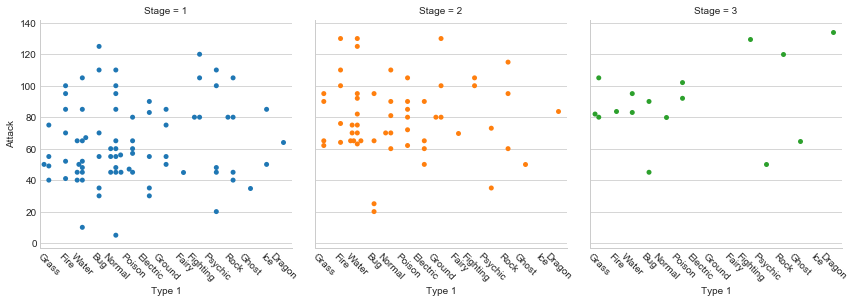

In [74]:
# Factor Plot
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

Density plots display the distribution between two variables.

Tip: Consider overlaying this with a scatter plot.

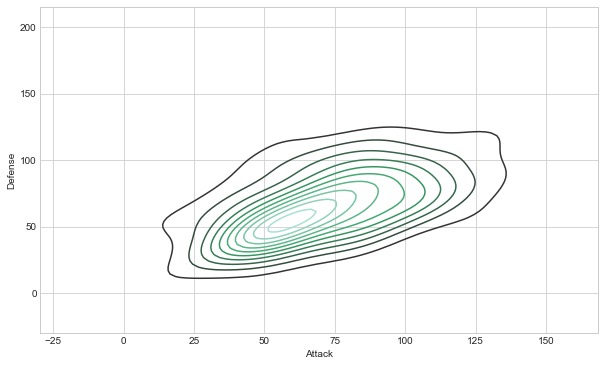

In [75]:
# Density Plot
plt.figure(figsize=(10,6))
sns.kdeplot(df.Attack, df.Defense)

Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions.

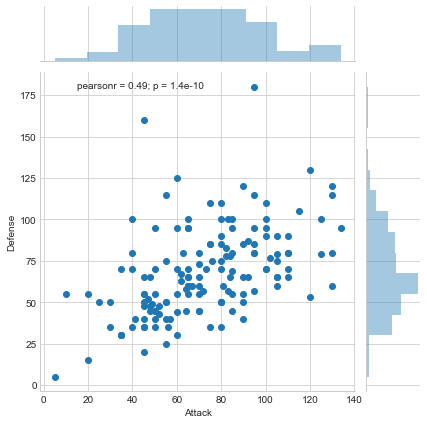

In [76]:
# Joint Distribution Plot

sns.jointplot(x='Attack', y='Defense', data=df)

Congratulations... you've made it to the end of this Python Seaborn tutorial!

We've just concluded a tour of key Seaborn paradigms and showed you many examples along the way. Feel free to use this page along with the official Seaborn gallery as references for your projects going forward.